In [37]:
import pandas as pd
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.lines as mlines

import math

In [142]:
data=pd.DataFrame(
    {
        "name":["facebook","4039_dense_graph","4039_dense_graph"],
        "n_nodes":[4039,4039,4039],
        "n_edges":[88234,8097333,8097333],
        "n_triangles":[1612010,-1,-1],
        "1_time":[75,1,1],
        "2_time":[39,1,1],
        "3_time":[32,1,1],
        "4_time":[31,1,1],
        "5_time":[26,1,1],
        "6_time":[21,1,1],
        "7_time":[18,1,1],
        "8_time":[17,1,1],
        "9_time":[22,1,1],
        "10_time":[25,1,1],
        "11_time":[22,1,1],
        "12_time":[29,1,1],
        "13_time":[17,1,1],
        "14_time":[19,1,1],
        "15_time":[20,1,1],
        "16_time":[20,1,1],
        "17_time":[20,1,1],
        "18_time":[21,1,1],
        "19_time":[20,1,1],
        "20_time":[20,1,1],
    }
)

data

,name,n_nodes,n_edges,n_triangles,1_time,2_time,3_time,4_time,5_time,6_time,...,11_time,12_time,13_time,14_time,15_time,16_time,17_time,18_time,19_time,20_time
0,facebook,4039,88234,1612010,75,39,32,31,26,21,...,22,29,17,19,20,20,20,21,20,20
1,4039_dense_graph,4039,8097333,-1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,4039_dense_graph,4039,8097333,-1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


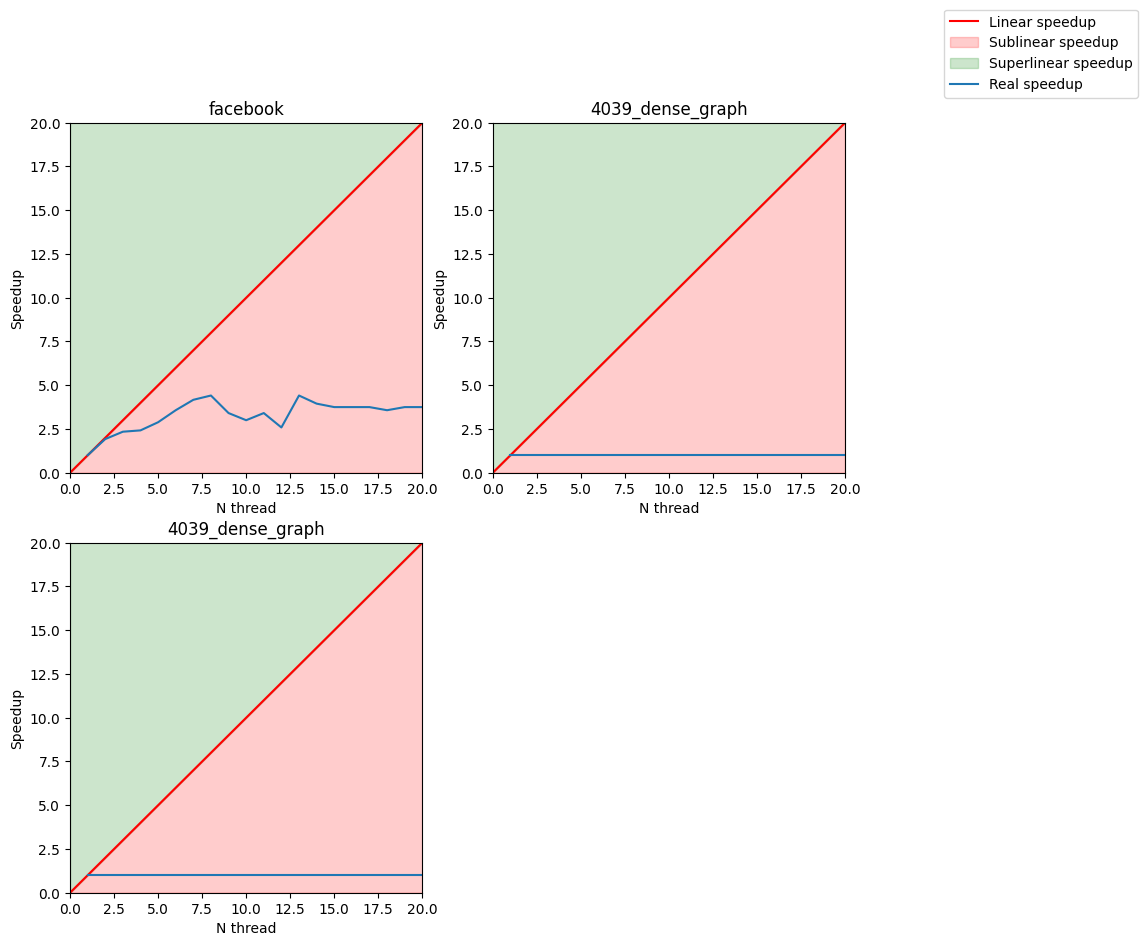

In [146]:
def plot_(max_thread:int):

    fig,axs=plt.subplots(math.ceil(data.shape[0]/2),2,figsize=(10,math.ceil(data.shape[0]/2)*5))
    
    axs=[item for sublist in axs for item in sublist]
    
    for index,row in data.iterrows():
        
        axs[index].set_xlabel("N thread")
        axs[index].set_ylabel("Speedup")
        
        axs[index].set_xlim([0,max_thread])
        axs[index].set_ylim([0,max_thread])
        
        axs[index].set_title(row["name"])
        
        line = mlines.Line2D([0, 1], [0, 1], color='red',label="Linear speedup")
        transform = axs[index].transAxes
        line.set_transform(transform)
        l1=axs[index].add_line(line)
        
        axs[index].fill_between([x for x in range(0,max_thread+1)],
                                [x for x in range(0,max_thread+1)],
                                alpha=0.2,color="red",label="Sublinear speedup")
        
        axs[index].fill_between([x for x in range(0,max_thread+1)],
                                [x for x in range(0,max_thread+1)],
                                max_thread, alpha=0.2,color="green", label="Superlinear speedup")
        
        l2=axs[index].plot([x for x in range(1,max_thread+1)],
                           [row["1_time"]/row[str(x)+"_time"] for x in range(1,max_thread+1)],
                           label="Real speedup")
        
        handles, labels = axs[index].get_legend_handles_labels()
    
    fig.legend(handles, labels, loc="upper right", bbox_to_anchor=(1.20, 1))
    
    for index in range(data.shape[0],len(axs)):
        axs[index].remove()

plot_(20)